In [745]:
# First run src/data_sources/get_game_data.py to get the csv in your working directory.
import pandas as pd
import json
import ast
import numpy as np
import math
import missingno as msno

In [746]:
# Import csv into dataframe.
raw_games_df = pd.read_csv('games.csv')
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,name,platforms,rating,rating_count,slug,total_rating,version_parent
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",The Last Guardian,"[{'id': 48, 'abbreviation': 'PS4', 'name': 'Pl...",83.088684,254.0,the-last-guardian,81.687199,NaN
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",Final Fantasy XV,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",76.906685,447.0,final-fantasy-xv,79.173343,NaN
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",Prison Architect,"[{'id': 3, 'abbreviation': 'Linux', 'name': 'L...",76.413665,152.0,prison-architect,78.745294,NaN
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",Mirror's Edge Catalyst,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",Star Wars Battlefront,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",67.284196,344.0,star-wars-battlefront--1,67.864320,NaN


In [747]:
raw_games_df.shape

(1882, 17)

There are 1882 games released by the companies included in the study between 1 October 2015 and 30 April 2023.

In [748]:
# Write function which checks if ESRB rating is 'Mature'.
def is_mature_esrb_rating(str_list_of_dicts):

    # Check for nan values; nan != nan.
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Hard-coded dictionary of ratings from https://api-docs.igdb.com/#age-rating.
    esrb_dict = {
        "6": "RP",
        "7": "EC",
        "8": "E",
        "9": "E10",
        "10": "T",
        "11": "M",
        "12": "AO"
    }

    # Loop through dictionaries in list
    for dictionary in list_of_dicts:

        try:
            # If rating is from ESRB (category 1).
            if dictionary.get('category') == 1:
                
                # Return True if ESRB rating is 'Mature'
                if esrb_dict[str(dictionary.get('rating'))] == 'M':
                    return True

                else:
                    # Return False for all other ratings.
                    return False

        except KeyError:
            print('ESRB rating id not in dictionary.')
            return math.nan

In [749]:
raw_games_df['mature'] = raw_games_df['age_ratings'].map(is_mature_esrb_rating)

In [750]:
print(raw_games_df.shape)
raw_games_df.head()

(1882, 18)


,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,name,platforms,rating,rating_count,slug,total_rating,version_parent,mature
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",The Last Guardian,"[{'id': 48, 'abbreviation': 'PS4', 'name': 'Pl...",83.088684,254.0,the-last-guardian,81.687199,NaN,False
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",Final Fantasy XV,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",76.906685,447.0,final-fantasy-xv,79.173343,NaN,False
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",Prison Architect,"[{'id': 3, 'abbreviation': 'Linux', 'name': 'L...",76.413665,152.0,prison-architect,78.745294,NaN,True
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",Mirror's Edge Catalyst,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",Star Wars Battlefront,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False


In [751]:
# Write function which checks if ESRB rating is 'Adults Only'.
def is_adults_only_esrb_rating(str_list_of_dicts):

    # Check for nan values; nan != nan.
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Hard-coded dictionary of ratings from https://api-docs.igdb.com/#age-rating.
    esrb_dict = {
        "6": "RP",
        "7": "EC",
        "8": "E",
        "9": "E10",
        "10": "T",
        "11": "M",
        "12": "AO"
    }

    # Loop through dictionaries in list
    for dictionary in list_of_dicts:

        try:
            # If rating is from ESRB (category 1).
            if dictionary.get('category') == 1:
                
                # Return True if ESRB rating is 'Mature'
                if esrb_dict[str(dictionary.get('rating'))] == 'AO':
                    return True

                else:
                    # Return False for all other ratings.
                    return False

        except KeyError:
            print('ESRB rating id not in dictionary.')
            return math.nan

In [752]:
raw_games_df['adults_only'] = raw_games_df['age_ratings'].map(is_adults_only_esrb_rating)

In [753]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,name,platforms,rating,rating_count,slug,total_rating,version_parent,mature,adults_only
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",The Last Guardian,"[{'id': 48, 'abbreviation': 'PS4', 'name': 'Pl...",83.088684,254.0,the-last-guardian,81.687199,NaN,False,False
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",Final Fantasy XV,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",76.906685,447.0,final-fantasy-xv,79.173343,NaN,False,False
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",Prison Architect,"[{'id': 3, 'abbreviation': 'Linux', 'name': 'L...",76.413665,152.0,prison-architect,78.745294,NaN,True,False
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",Mirror's Edge Catalyst,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False,False
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",Star Wars Battlefront,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False,False


In [754]:
# Write function which checks if the game was released on only Nintendo 3DS or 
# Playstation Vita.
def released_on_3ds_or_vita_only(str_list_of_dicts):

    # Check for nan values; nan != nan.
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Check the length of the list.
    list_len = len(list_of_dicts)

    # Loop through dictionaries in list
    for dictionary in list_of_dicts:

        try:
            # If game has only one platform and it is either 3DS or Vita.
            if (dictionary.get('abbreviation') == '3DS' or dictionary.get('abbreviation') == 'Vita') and (list_len == 1):

                return True

            else:
                # Return False for all other ratings.
                return False

        except KeyError:
            print('ESRB rating id not in dictionary.')
            return math.nan

In [755]:
raw_games_df['3ds_or_vita_only'] = raw_games_df['platforms'].map(released_on_3ds_or_vita_only)

In [756]:
# Check how many games were released on 3DS or Vita only.
raw_games_df[raw_games_df['3ds_or_vita_only'] == True].shape[0]

84

In [757]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,name,platforms,rating,rating_count,slug,total_rating,version_parent,mature,adults_only,3ds_or_vita_only
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",The Last Guardian,"[{'id': 48, 'abbreviation': 'PS4', 'name': 'Pl...",83.088684,254.0,the-last-guardian,81.687199,NaN,False,False,False
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",Final Fantasy XV,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",76.906685,447.0,final-fantasy-xv,79.173343,NaN,False,False,False
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",Prison Architect,"[{'id': 3, 'abbreviation': 'Linux', 'name': 'L...",76.413665,152.0,prison-architect,78.745294,NaN,True,False,False
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",Mirror's Edge Catalyst,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False,False,False
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",Star Wars Battlefront,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False,False,False


In [758]:
# Write function which extracts if the game is a single player game.
def is_single_player(str_list_of_dicts):

    # Check for nan values
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Loop through dictionaries in list
    for dict in list_of_dicts:

        # If single player.
        if dict.get('name') == 'Single player':
            return True
                
        else:
            return False

In [759]:
# Write function which extracts if the game is a multiplayer game.
def is_multiplayer(str_list_of_dicts):

    # Check for nan values
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Loop through dictionaries in list
    for dict in list_of_dicts:

        # If multiplayer.
        if dict.get('name') == 'Multiplayer':
            return True
                
        else:
            return False

In [760]:
raw_games_df['single_player'] = raw_games_df['game_modes'].map(is_single_player)

In [761]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,platforms,rating,rating_count,slug,total_rating,version_parent,mature,adults_only,3ds_or_vita_only,single_player
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,"[{'id': 48, 'abbreviation': 'PS4', 'name': 'Pl...",83.088684,254.0,the-last-guardian,81.687199,NaN,False,False,False,True
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",76.906685,447.0,final-fantasy-xv,79.173343,NaN,False,False,False,True
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,"[{'id': 3, 'abbreviation': 'Linux', 'name': 'L...",76.413665,152.0,prison-architect,78.745294,NaN,True,False,False,True
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False,False,False,True
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,"[{'id': 6, 'abbreviation': 'PC', 'name': 'PC (...",67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False,False,False,True


In [762]:
raw_games_df['multiplayer'] = raw_games_df['game_modes'].map(is_multiplayer)

In [763]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,rating,rating_count,slug,total_rating,version_parent,mature,adults_only,3ds_or_vita_only,single_player,multiplayer
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,83.088684,254.0,the-last-guardian,81.687199,NaN,False,False,False,True,False
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,76.906685,447.0,final-fantasy-xv,79.173343,NaN,False,False,False,True,False
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,76.413665,152.0,prison-architect,78.745294,NaN,True,False,False,True,False
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False,False,False,True,False
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False,False,False,True,False


In [764]:
# Write function which extracts the IGDB developer id.
def get_developer_id(str_list_of_dicts):

    # Check for nan values
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Get json of company information
    with open('companies.json') as json_file:
        companies_dict = json.load(json_file)

    # Get all igdb ids of involved companies.
    igdb_ids_list = []
    for company in companies_dict:
        igdb_ids_list = igdb_ids_list + company['igdb_ids']

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Create a list of all publisher ids which are in study.
    result = [d['company']['id'] for d in list_of_dicts if (d['company']['id'] in igdb_ids_list and d['developer'] == True)]
    return result



In [765]:
# Write function which extracts the developer id.
def get_publisher_id(str_list_of_dicts):

    # Check for nan values
    if str_list_of_dicts != str_list_of_dicts:
        return

    # Get json of company information
    with open('companies.json') as json_file:
        companies_dict = json.load(json_file)

    # Get all igdb ids of involved companies.
    igdb_ids_list = []
    for company in companies_dict:
        igdb_ids_list = igdb_ids_list + company['igdb_ids']

    # Convert string representation of list of dicts to list of dicts.
    list_of_dicts = ast.literal_eval(str_list_of_dicts)

    # Create a list of all publisher ids which are in study.
    result = [d['company']['id'] for d in list_of_dicts if (d['company']['id'] in igdb_ids_list and d['publisher'] == True)]

    return result


In [766]:
raw_games_df['developer_id'] = raw_games_df['involved_companies'].map(get_developer_id)
raw_games_df['publisher_id'] = raw_games_df['involved_companies'].map(get_publisher_id)

In [767]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,slug,total_rating,version_parent,mature,adults_only,3ds_or_vita_only,single_player,multiplayer,developer_id,publisher_id
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,the-last-guardian,81.687199,NaN,False,False,False,True,False,[],[10100]
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,final-fantasy-xv,79.173343,NaN,False,False,False,True,False,[26],[26]
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,prison-architect,78.745294,NaN,True,False,False,True,False,[],[517]
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,mirrors-edge-catalyst,69.475921,NaN,False,False,False,True,False,[],[1]
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,star-wars-battlefront--1,67.864320,NaN,False,False,False,True,False,[],[1]


In [768]:
def get_stock_id_from_igdb_id(id_list):

    # If id_list is empty return np.nan.
    if id_list == False:
        return np.nan

    # Get json of company information
    with open('companies.json') as json_file:
        companies_dict = json.load(json_file)

    # Placeholder values
    stock_id = np.nan
    multiple_id_list = []

    # Loop through igdb_ids in list of developer/publisher ids.
    for igdb_id in id_list:
        # Loop through companies json
        for company in companies_dict:
            # If the igdb_id matches a company from companies json.
            if igdb_id in company['igdb_ids']:
                # Continue if the stock_id is the same as the one already stored.
                if company['stock_id'] == stock_id:
                    continue
                
                # If stock_id not np.nan (placeholder value) and not equal to 
                # stock_id from companies json.
                elif (stock_id != stock_id and (company['stock_id'] != stock_id)):
                    multiple_id_list.append(company['stock_id'])
                    print("Two stock ids for one game " + str(stock_id) + " " + str(company['stock_id']))

                # Set stock_id to the one found in companies json.
                else:
                    stock_id = company['stock_id']

    print(stock_id)
    return stock_id

In [769]:
def get_stock_ids(igdb_ids):

    # Get json of company information
    with open('companies.json') as json_file:
        companies_dict = json.load(json_file)

    stock_ids = []
    for company in companies_dict:
        if any(id in company['igdb_ids'] for id in igdb_ids):
            stock_ids.append(company['stock_id'])
    return stock_ids

In [770]:
raw_games_df['developer_stock_id'] = raw_games_df['developer_id'].map(get_stock_ids)
raw_games_df['publisher_stock_id'] = raw_games_df['publisher_id'].map(get_stock_ids)

In [771]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,version_parent,mature,adults_only,3ds_or_vita_only,single_player,multiplayer,developer_id,publisher_id,developer_stock_id,publisher_stock_id
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,NaN,False,False,False,True,False,[],[10100],[],[JP3435000009]
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,NaN,False,False,False,True,False,[26],[26],[JP3164630000],[JP3164630000]
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,NaN,True,False,False,True,False,[],[517],[],[SE0008294953]
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,NaN,False,False,False,True,False,[],[1],[],[016721]
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,NaN,False,False,False,True,False,[],[1],[],[016721]


In [772]:
raw_games_df.shape

(1882, 26)

In [773]:
# Count the number of stock_ids in each column.
raw_games_df['dev_stock_id_count'] = raw_games_df['developer_stock_id'].map(len)
raw_games_df['pub_stock_id_count'] = raw_games_df['publisher_stock_id'].map(len)

In [774]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,adults_only,3ds_or_vita_only,single_player,multiplayer,developer_id,publisher_id,developer_stock_id,publisher_stock_id,dev_stock_id_count,pub_stock_id_count
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,False,False,True,False,[],[10100],[],[JP3435000009],0,1
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,False,False,True,False,[26],[26],[JP3164630000],[JP3164630000],1,1
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,False,False,True,False,[],[517],[],[SE0008294953],0,1
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,False,False,True,False,[],[1],[],[016721],0,1
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,False,False,True,False,[],[1],[],[016721],0,1


In [775]:
raw_games_df['dev_stock_id_count'].value_counts()

dev_stock_id_count
0    1453
1     428
2       1
Name: count, dtype: int64

In [776]:
raw_games_df[raw_games_df['dev_stock_id_count'] > 1]['name']

46    Monster Hunter Stories
Name: name, dtype: object

Most games only have one developer stock id. Allow a maximum of two companies per game for simplicity.

In [777]:
raw_games_df['pub_stock_id_count'].value_counts()

pub_stock_id_count
1    1736
0     108
2      38
Name: count, dtype: int64

Most games only have one publisher stock id. Intend to allow a maximum of two companies per game for simplicity.

In [778]:
# Where there is more than one developer or publisher stock_id, check if they 
# are for the same company.
def check_same_company(stock_ids):

    if stock_ids == []:
        return np.nan

    # Get json of company information
    with open('companies.json') as json_file:
        companies_dict = json.load(json_file)
    
    # Return true
    company_names = []
    for company in companies_dict:
        if company['stock_id'] in stock_ids:
            company_names.append(company['company_name'])

    if all(x == company_names[0] for x in company_names):
        return True
    else:
        return False

In [779]:
raw_games_df['dev_same_company'] = raw_games_df['developer_stock_id'].map(check_same_company)
raw_games_df['pub_same_company'] = raw_games_df['publisher_stock_id'].map(check_same_company)

In [780]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,single_player,multiplayer,developer_id,publisher_id,developer_stock_id,publisher_stock_id,dev_stock_id_count,pub_stock_id_count,dev_same_company,pub_same_company
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,True,False,[],[10100],[],[JP3435000009],0,1,NaN,True
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,True,False,[26],[26],[JP3164630000],[JP3164630000],1,1,True,True
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,True,False,[],[517],[],[SE0008294953],0,1,NaN,True
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,True,False,[],[1],[],[016721],0,1,NaN,True
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,True,False,[],[1],[],[016721],0,1,NaN,True


In [781]:
raw_games_df[(raw_games_df['dev_same_company'] == True) & (raw_games_df['dev_stock_id_count'] > 1)]

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,single_player,multiplayer,developer_id,publisher_id,developer_stock_id,publisher_stock_id,dev_stock_id_count,pub_stock_id_count,dev_same_company,pub_same_company


There are no games where the same stock_id is used twice for the developer.

In [782]:
raw_games_df[(raw_games_df['dev_same_company'] == True) & (raw_games_df['dev_stock_id_count'] > 1)]

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,single_player,multiplayer,developer_id,publisher_id,developer_stock_id,publisher_stock_id,dev_stock_id_count,pub_stock_id_count,dev_same_company,pub_same_company


There are no games where the same stock_id is used twice for the publisher.

In [783]:
# Function for setting first stock_id for each of the two 
# stock_id columns for devs/pubs.
def extract_first_id(list_of_ids):
    
    # Return np.nan if list of stock_ids is empty.
    if len(list_of_ids) < 1:
        return 0

    else:
      dev_id = list_of_ids[0]
      return dev_id

In [784]:
# Function for setting second stock_id for each of the two 
# stock_id columns for devs/pubs.
def extract_second_id(list_of_ids):
    
    # Return np.nan if there is only one stock_id in list.
    if len(list_of_ids) < 2:
        return 0

    else:
      dev_id = list_of_ids[1]
      return dev_id

In [785]:
raw_games_df['dev1_igdb_id'] = raw_games_df['developer_stock_id'].map(extract_first_id)
raw_games_df['dev2_igdb_id'] = raw_games_df['developer_stock_id'].map(extract_second_id)
raw_games_df['pub1_igdb_id'] = raw_games_df['publisher_stock_id'].map(extract_first_id)
raw_games_df['pub2_igdb_id'] = raw_games_df['publisher_stock_id'].map(extract_second_id)

In [786]:
raw_games_df['dev1_stock_id'] = raw_games_df['developer_id'].map(extract_first_id)
raw_games_df['dev2_stock_id'] = raw_games_df['developer_id'].map(extract_second_id)
raw_games_df['pub1_stock_id'] = raw_games_df['publisher_id'].map(extract_first_id)
raw_games_df['pub2_stock_id'] = raw_games_df['publisher_id'].map(extract_second_id)

In [787]:
raw_games_df.head()

,Unnamed: 0,id,age_ratings,aggregated_rating,aggregated_rating_count,first_release_date,follows,game_modes,genres,involved_companies,...,dev_same_company,pub_same_company,dev1_igdb_id,dev2_igdb_id,pub1_igdb_id,pub2_igdb_id,dev1_stock_id,dev2_stock_id,pub1_stock_id,pub2_stock_id
0,0,117,"[{'id': 12941, 'category': 1, 'rating': 10}, {...",80.285714,23.0,1480982400,222.0,"[{'id': 1, 'name': 'Single player'}]","[{'id': 8, 'name': 'Platform'}, {'id': 9, 'nam...","[{'id': 36389, 'company': {'id': 44, 'name': '...",...,NaN,True,0,0,JP3435000009,0,0,0,10100,0
1,1,359,"[{'id': 14065, 'category': 1, 'rating': 10}, {...",81.440000,29.0,1480377600,266.0,"[{'id': 1, 'name': 'Single player'}, {'id': 3,...","[{'id': 12, 'name': 'Role-playing (RPG)'}, {'i...","[{'id': 53470, 'company': {'id': 2670, 'name':...",...,True,True,JP3164630000,0,JP3164630000,0,26,0,26,0
2,2,1338,"[{'id': 35834, 'category': 2, 'rating': 4}, {'...",81.076923,15.0,1444089600,80.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 13, 'name': 'Simulator'}, {'id': 15, '...","[{'id': 201720, 'company': {'id': 1224, 'name'...",...,NaN,True,0,0,SE0008294953,0,0,0,517,0
3,3,2112,"[{'id': 8820, 'category': 1, 'rating': 10}, {'...",69.185185,29.0,1465257600,210.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 4, 'name': 'Fighting'}, {'id': 31, 'na...","[{'id': 7372, 'company': {'id': 1, 'name': 'El...",...,NaN,True,0,0,016721,0,0,0,1,0
4,4,2113,"[{'id': 32525, 'category': 1, 'rating': 10}, {...",68.444444,21.0,1447718400,185.0,"[{'id': 1, 'name': 'Single player'}, {'id': 2,...","[{'id': 5, 'name': 'Shooter'}]","[{'id': 56415, 'company': {'id': 1, 'name': 'E...",...,NaN,True,0,0,016721,0,0,0,1,0


In [788]:
raw_games_df.columns

Index(['Unnamed: 0', 'id', 'age_ratings', 'aggregated_rating',
       'aggregated_rating_count', 'first_release_date', 'follows',
       'game_modes', 'genres', 'involved_companies', 'name', 'platforms',
       'rating', 'rating_count', 'slug', 'total_rating', 'version_parent',
       'mature', 'adults_only', '3ds_or_vita_only', 'single_player',
       'multiplayer', 'developer_id', 'publisher_id', 'developer_stock_id',
       'publisher_stock_id', 'dev_stock_id_count', 'pub_stock_id_count',
       'dev_same_company', 'pub_same_company', 'dev1_igdb_id', 'dev2_igdb_id',
       'pub1_igdb_id', 'pub2_igdb_id', 'dev1_stock_id', 'dev2_stock_id',
       'pub1_stock_id', 'pub2_stock_id'],
      dtype='object')

In [789]:
raw_games_df.to_csv('raw_games_flattened.csv')

# Data cleaning
## Remove unflattened columns
Now that the games data has been extracted and flattened, only the necessary columns are kept in the dataframe.

In [790]:
games_df = raw_games_df[[
    'id',
    'aggregated_rating',
    'aggregated_rating_count',
    'first_release_date',
    'follows',
    'name',
    'rating',
    'rating_count',
    'slug',
    'total_rating',
    'version_parent',
    'mature',
    'adults_only',
    'single_player',
    'multiplayer',
    'dev1_stock_id',
    'dev2_stock_id',
    'pub1_stock_id',
    'pub2_stock_id',
    '3ds_or_vita_only'
]]

In [791]:
games_df.head()

,id,aggregated_rating,aggregated_rating_count,first_release_date,follows,name,rating,rating_count,slug,total_rating,version_parent,mature,adults_only,single_player,multiplayer,dev1_stock_id,dev2_stock_id,pub1_stock_id,pub2_stock_id,3ds_or_vita_only
0,117,80.285714,23.0,1480982400,222.0,The Last Guardian,83.088684,254.0,the-last-guardian,81.687199,NaN,False,False,True,False,0,0,10100,0,False
1,359,81.440000,29.0,1480377600,266.0,Final Fantasy XV,76.906685,447.0,final-fantasy-xv,79.173343,NaN,False,False,True,False,26,0,26,0,False
2,1338,81.076923,15.0,1444089600,80.0,Prison Architect,76.413665,152.0,prison-architect,78.745294,NaN,True,False,True,False,0,0,517,0,False
3,2112,69.185185,29.0,1465257600,210.0,Mirror's Edge Catalyst,69.766656,209.0,mirrors-edge-catalyst,69.475921,NaN,False,False,True,False,0,0,1,0,False
4,2113,68.444444,21.0,1447718400,185.0,Star Wars Battlefront,67.284196,344.0,star-wars-battlefront--1,67.864320,NaN,False,False,True,False,0,0,1,0,False


Remove any games where 'version_parent' is not NaN. This means that this game is a version of a base game and only base games are included in this analysis.

In [792]:
# Number of games where version parent is not NaN.
games_df[games_df['version_parent'].notnull()].shape[0]

437

In [793]:
# Exclude games where version_parent is not NaN.
games_df = games_df[~games_df['version_parent'].notnull()]

# Drop version_parent column as it is no longer used.
games_df = games_df.drop('version_parent', axis=1)

In [794]:
games_df.head()

,id,aggregated_rating,aggregated_rating_count,first_release_date,follows,name,rating,rating_count,slug,total_rating,mature,adults_only,single_player,multiplayer,dev1_stock_id,dev2_stock_id,pub1_stock_id,pub2_stock_id,3ds_or_vita_only
0,117,80.285714,23.0,1480982400,222.0,The Last Guardian,83.088684,254.0,the-last-guardian,81.687199,False,False,True,False,0,0,10100,0,False
1,359,81.440000,29.0,1480377600,266.0,Final Fantasy XV,76.906685,447.0,final-fantasy-xv,79.173343,False,False,True,False,26,0,26,0,False
2,1338,81.076923,15.0,1444089600,80.0,Prison Architect,76.413665,152.0,prison-architect,78.745294,True,False,True,False,0,0,517,0,False
3,2112,69.185185,29.0,1465257600,210.0,Mirror's Edge Catalyst,69.766656,209.0,mirrors-edge-catalyst,69.475921,False,False,True,False,0,0,1,0,False
4,2113,68.444444,21.0,1447718400,185.0,Star Wars Battlefront,67.284196,344.0,star-wars-battlefront--1,67.864320,False,False,True,False,0,0,1,0,False


Remove any games which have an 'Adults Only' rating. These games are quite niche and are usually not available on consoles.

In [795]:
# Remove games with 'AO' rating.
games_df = games_df[games_df['adults_only'] == False]

# Drop adults_only column as it is no longer used.
games_df = games_df.drop('adults_only', axis=1)

In [796]:
games_df.head()

,id,aggregated_rating,aggregated_rating_count,first_release_date,follows,name,rating,rating_count,slug,total_rating,mature,single_player,multiplayer,dev1_stock_id,dev2_stock_id,pub1_stock_id,pub2_stock_id,3ds_or_vita_only
0,117,80.285714,23.0,1480982400,222.0,The Last Guardian,83.088684,254.0,the-last-guardian,81.687199,False,True,False,0,0,10100,0,False
1,359,81.440000,29.0,1480377600,266.0,Final Fantasy XV,76.906685,447.0,final-fantasy-xv,79.173343,False,True,False,26,0,26,0,False
2,1338,81.076923,15.0,1444089600,80.0,Prison Architect,76.413665,152.0,prison-architect,78.745294,True,True,False,0,0,517,0,False
3,2112,69.185185,29.0,1465257600,210.0,Mirror's Edge Catalyst,69.766656,209.0,mirrors-edge-catalyst,69.475921,False,True,False,0,0,1,0,False
4,2113,68.444444,21.0,1447718400,185.0,Star Wars Battlefront,67.284196,344.0,star-wars-battlefront--1,67.864320,False,True,False,0,0,1,0,False


Remove any games which were released on 3DS or Vita only and released before 1 March 2016 due to recommendation from [OpenCritic FAQs](https://opencritic.com/faq).

In [797]:
games_df = games_df[~(games_df['3ds_or_vita_only'] == True) & (games_df['first_release_date'] > 1456786800)]

In [798]:
games_df.head()

,id,aggregated_rating,aggregated_rating_count,first_release_date,follows,name,rating,rating_count,slug,total_rating,mature,single_player,multiplayer,dev1_stock_id,dev2_stock_id,pub1_stock_id,pub2_stock_id,3ds_or_vita_only
0,117,80.285714,23.0,1480982400,222.0,The Last Guardian,83.088684,254.0,the-last-guardian,81.687199,False,True,False,0,0,10100,0,False
1,359,81.440000,29.0,1480377600,266.0,Final Fantasy XV,76.906685,447.0,final-fantasy-xv,79.173343,False,True,False,26,0,26,0,False
3,2112,69.185185,29.0,1465257600,210.0,Mirror's Edge Catalyst,69.766656,209.0,mirrors-edge-catalyst,69.475921,False,True,False,0,0,1,0,False
5,2212,84.714286,8.0,1459209600,1.0,MLB The Show 16,75.701276,9.0,mlb-the-show-16,80.207781,False,True,False,0,0,13634,0,False
6,2933,89.800000,15.0,1548374400,220.0,Kingdom Hearts III,75.012375,181.0,kingdom-hearts-iii,82.406187,False,True,False,26,0,26,0,False


In [799]:
games_df.shape

(1015, 18)

<Axes: >

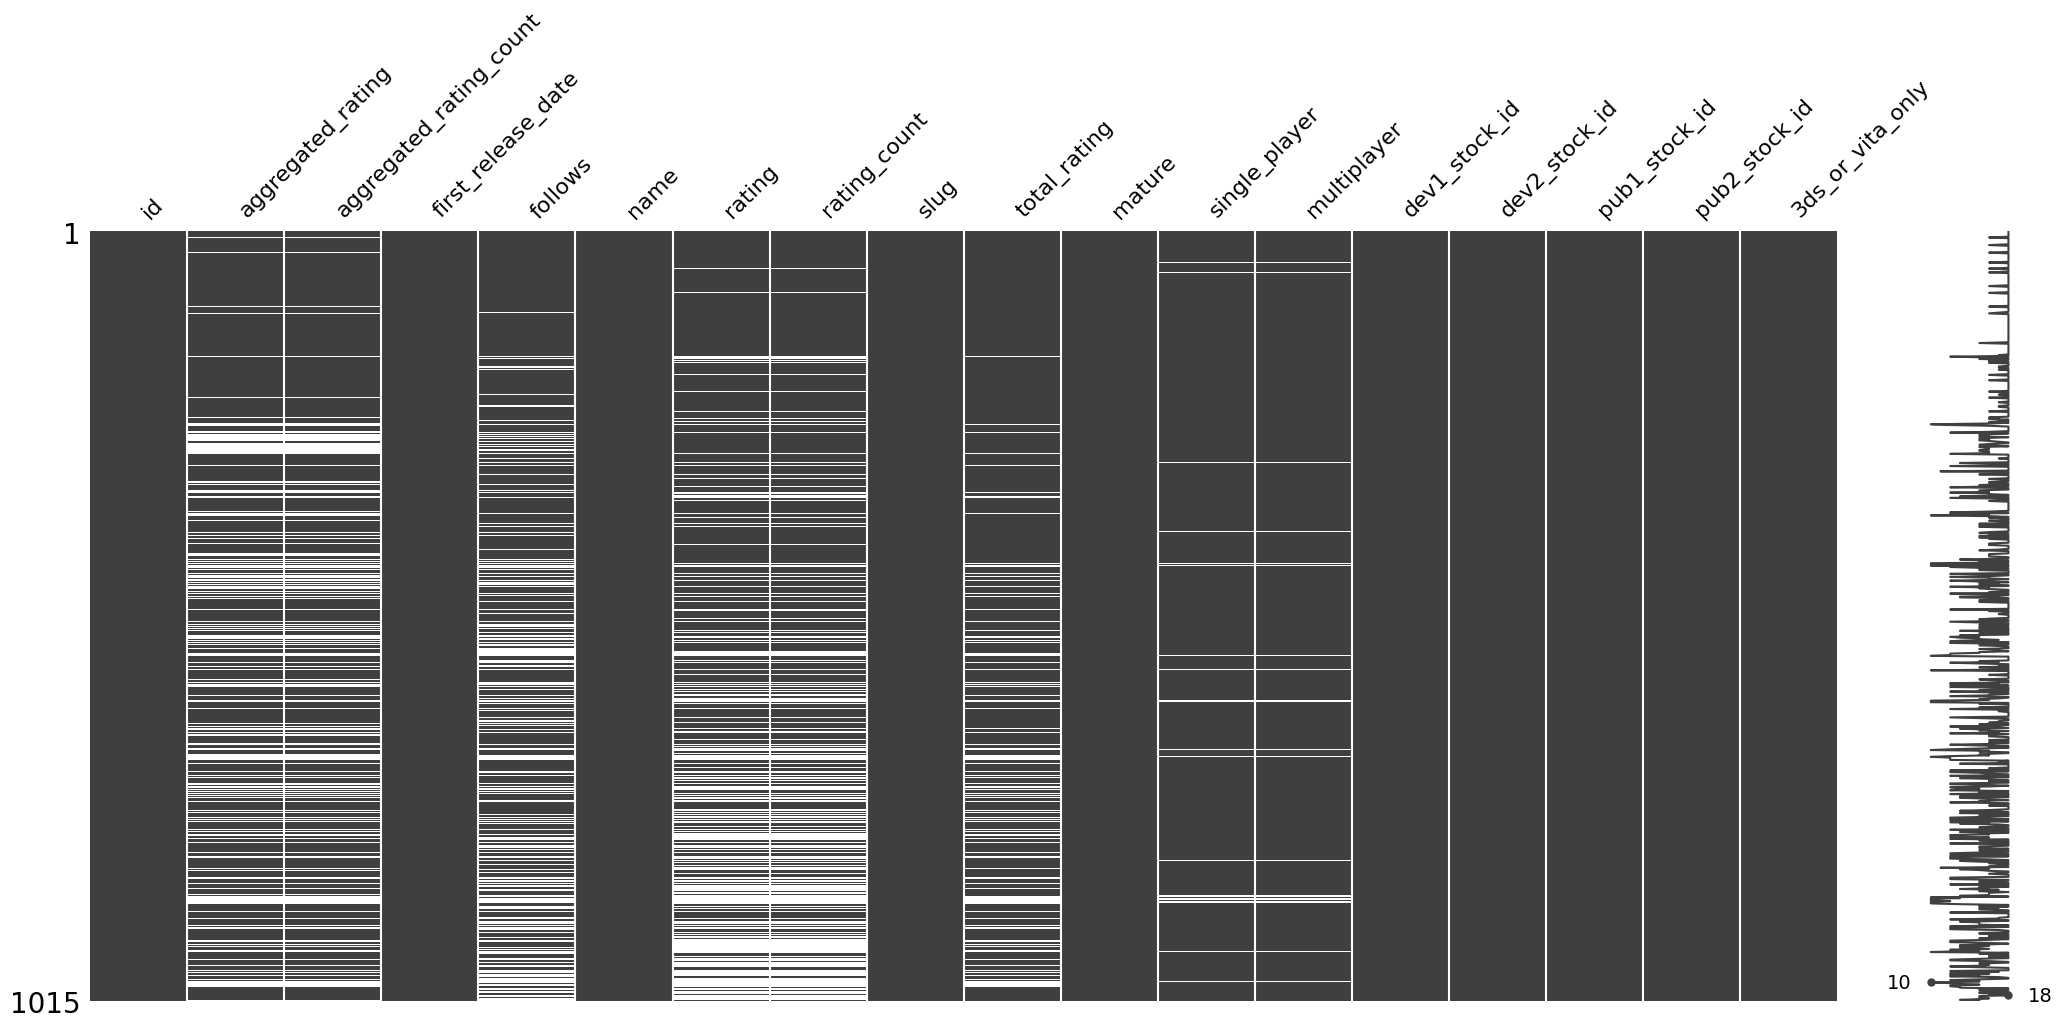

In [800]:
# Plot missing data.
%matplotlib inline
msno.matrix(games_df)

In [801]:
games_df = games_df.dropna()
games_df.shape

(566, 18)

<Axes: >

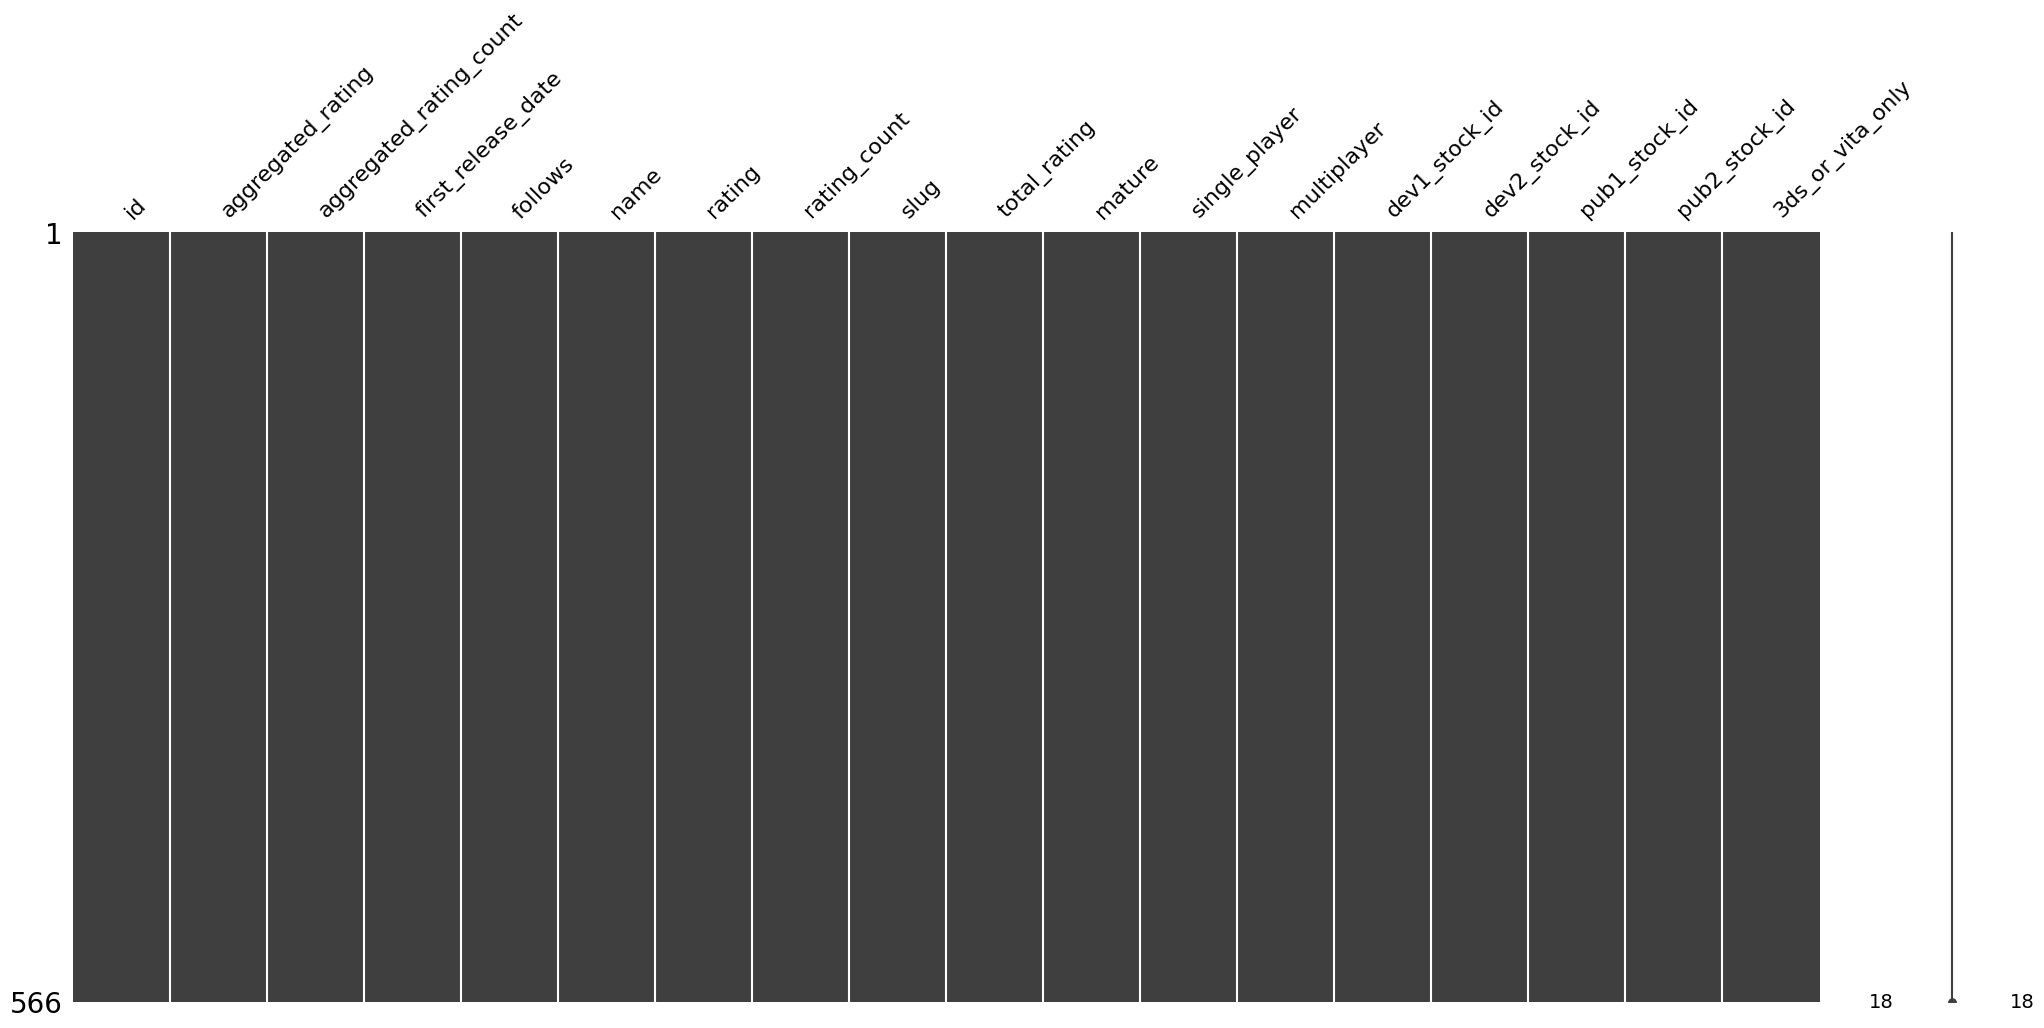

In [802]:
%matplotlib inline
msno.matrix(games_df)